<h1><center>Supervised ML Regression Competition</center></h1>


<img align="center" src="https://compraracciones.com/wp-content/uploads/2021/04/insurance.jpg" style="height:200px" style="width:100px"/>

<hr style="border:2px solid pink"> </hr>

You have been assigned the task of building a model that will predict the insurance cost

You'll find the data in the csv file `insurance`


- target col: "charges"


<hr style="border:2px solid pink"> </hr>


**Guidelines:** 


- train_test_split
    - random state = 42
    - test size = 0.3


- The one who gets the highest r2-score on test data wins


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Initial Data Exploration

Let's start by loading our dataset and taking a first look at it.


In [2]:
data = pd.read_csv('insurance.csv')

display(data.head())
display(data.info())
display(data.describe())


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,7725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,15799.570247
std,14.049960,6.098187,1.205493,12559.984021
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,8106.480000
50%,39.000000,30.400000,1.000000,12403.585225
75%,51.000000,34.693750,2.000000,18948.612903
max,64.000000,53.130000,5.000000,64571.074480


## 2. Checking for Missing Values

It's important to know if our data has any missing values. Let's check that next.


In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## 3. Descriptive Statistics

Now, let's move on to some descriptive statistics.

Understanding the distribution of our data is crucial. Let's calculate some descriptive statistics.


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,15799.570247
std,14.049960,6.098187,1.205493,12559.984021
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,8106.480000
50%,39.000000,30.400000,1.000000,12403.585225
75%,51.000000,34.693750,2.000000,18948.612903
max,64.000000,53.130000,5.000000,64571.074480


## 4. Distribution Analysis

Visualizing the distributions of our features can provide valuable insights. Let's plot the distributions for 'age', 'bmi', and 'charges'.

### Task:
- Plot the histogram for 'age'
- Plot the histogram for 'bmi'
- Plot the histogram for 'charges'


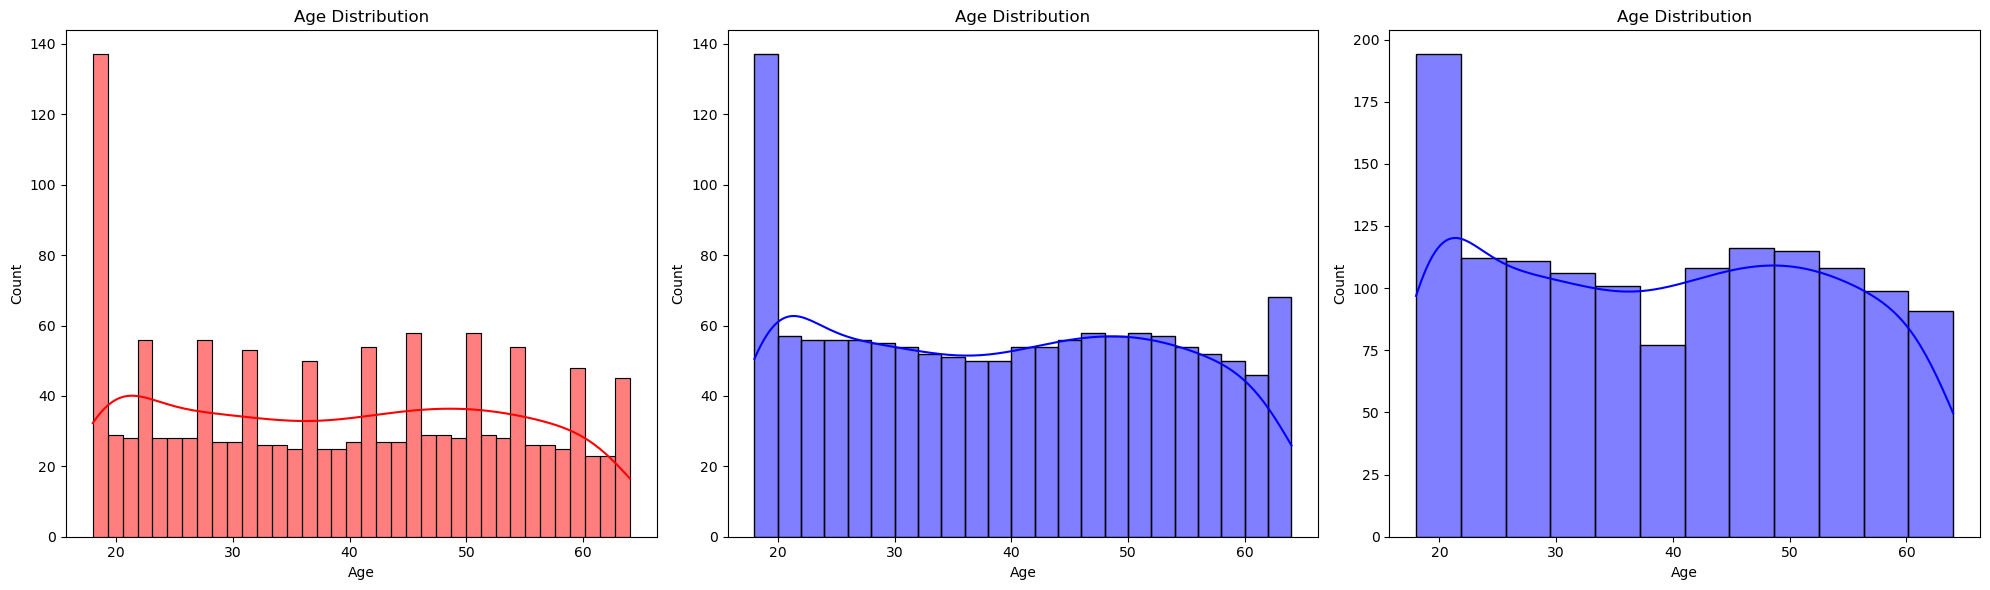

In [5]:
# set bin size as square root of number of data points
bin_s = int(np.sqrt(len(data)))



# plot various histograms for data['age'] with different bin sizes, one next to the other
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
sns.histplot(data['age'], bins=bin_s, kde=True, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.histplot(data['age'], bins=23, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.histplot(data['age'], bins=12, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

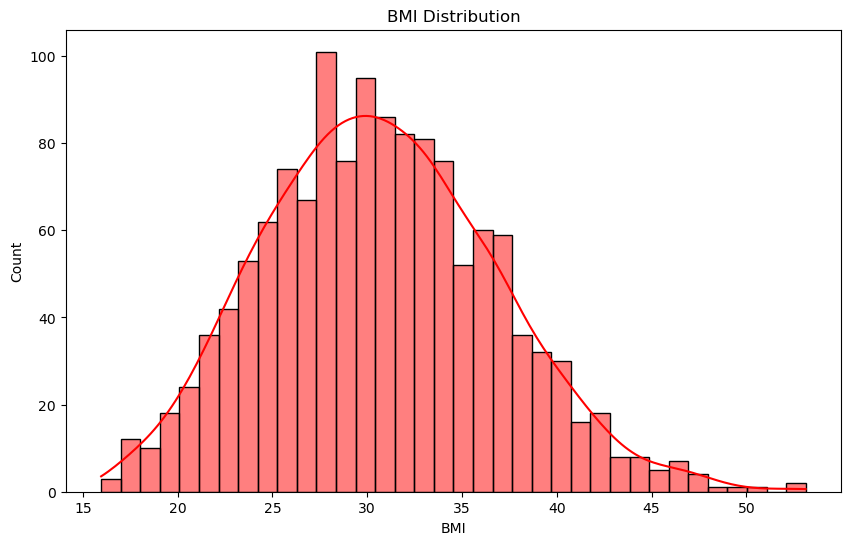

In [6]:
# histogram for data['bmi']
plt.figure(figsize=(10,6))
sns.histplot(data['bmi'], bins=bin_s, kde=True, color='red')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

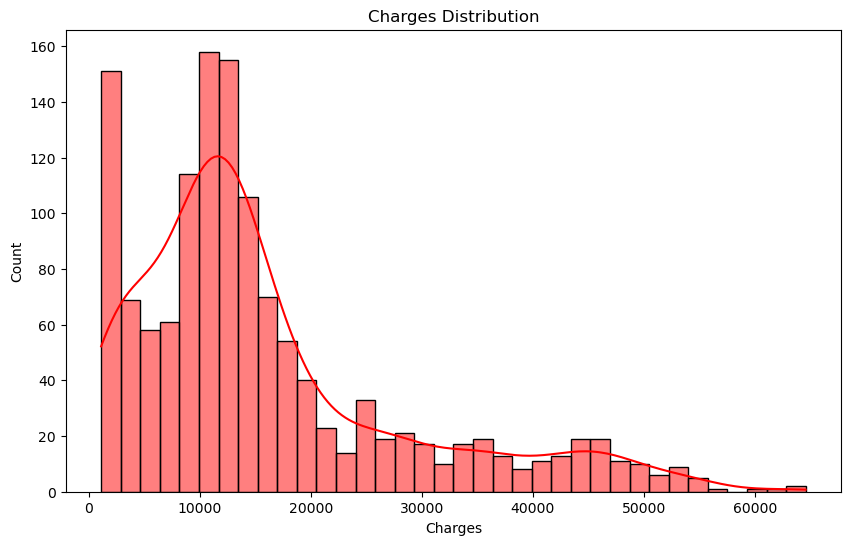

In [7]:
# histogram for data['charges']
plt.figure(figsize=(10,6))
sns.histplot(data['charges'], bins=bin_s, kde=True, color='red')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

## 5. Relationship Between Variables

Let's explore the relationship between some of our features and the target variable 'charges'. We'll create scatter plots to visualize these relationships.

### Task:
- Create a scatter plot for 'age' vs 'charges'
- Create a scatter plot for 'bmi' vs 'charges'
- Create a scatter plot for 'children' vs 'charges'


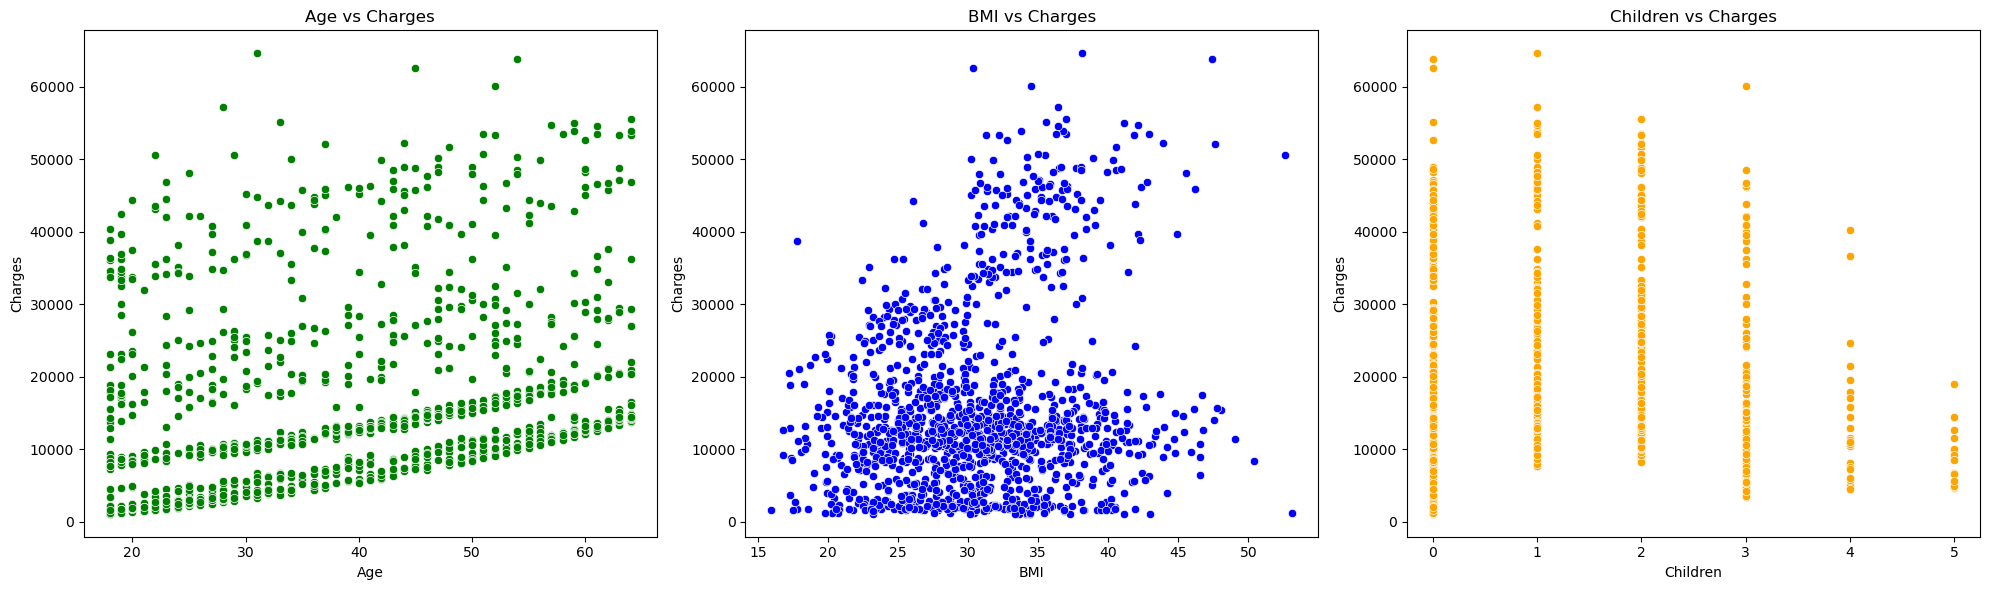

In [8]:
plt.figure(figsize=(20,6))

# scatterplot for data['age'] and data['charges']
plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='charges', data=data, color = "green")
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# scatterplot for data['bmi'] and data['charges']
plt.subplot(1, 3, 2)
sns.scatterplot(x='bmi', y='charges', data=data, color = "blue")
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

# children vs charges
plt.subplot(1, 3, 3)
sns.scatterplot(x='children', y='charges', data=data, color = "orange")
plt.title('Children vs Charges')
plt.xlabel('Children')
plt.ylabel('Charges')

plt.tight_layout()

plt.show()

## 6. Categorical Analysis

Let's analyze the categorical features 'sex', 'smoker', and 'region' to see how they relate to 'charges'.

### Task:
- Plot the distribution of 'charges' for different 'sex'
- Plot the distribution of 'charges' for different 'smoker'
- Plot the distribution of 'charges' for different 'region'


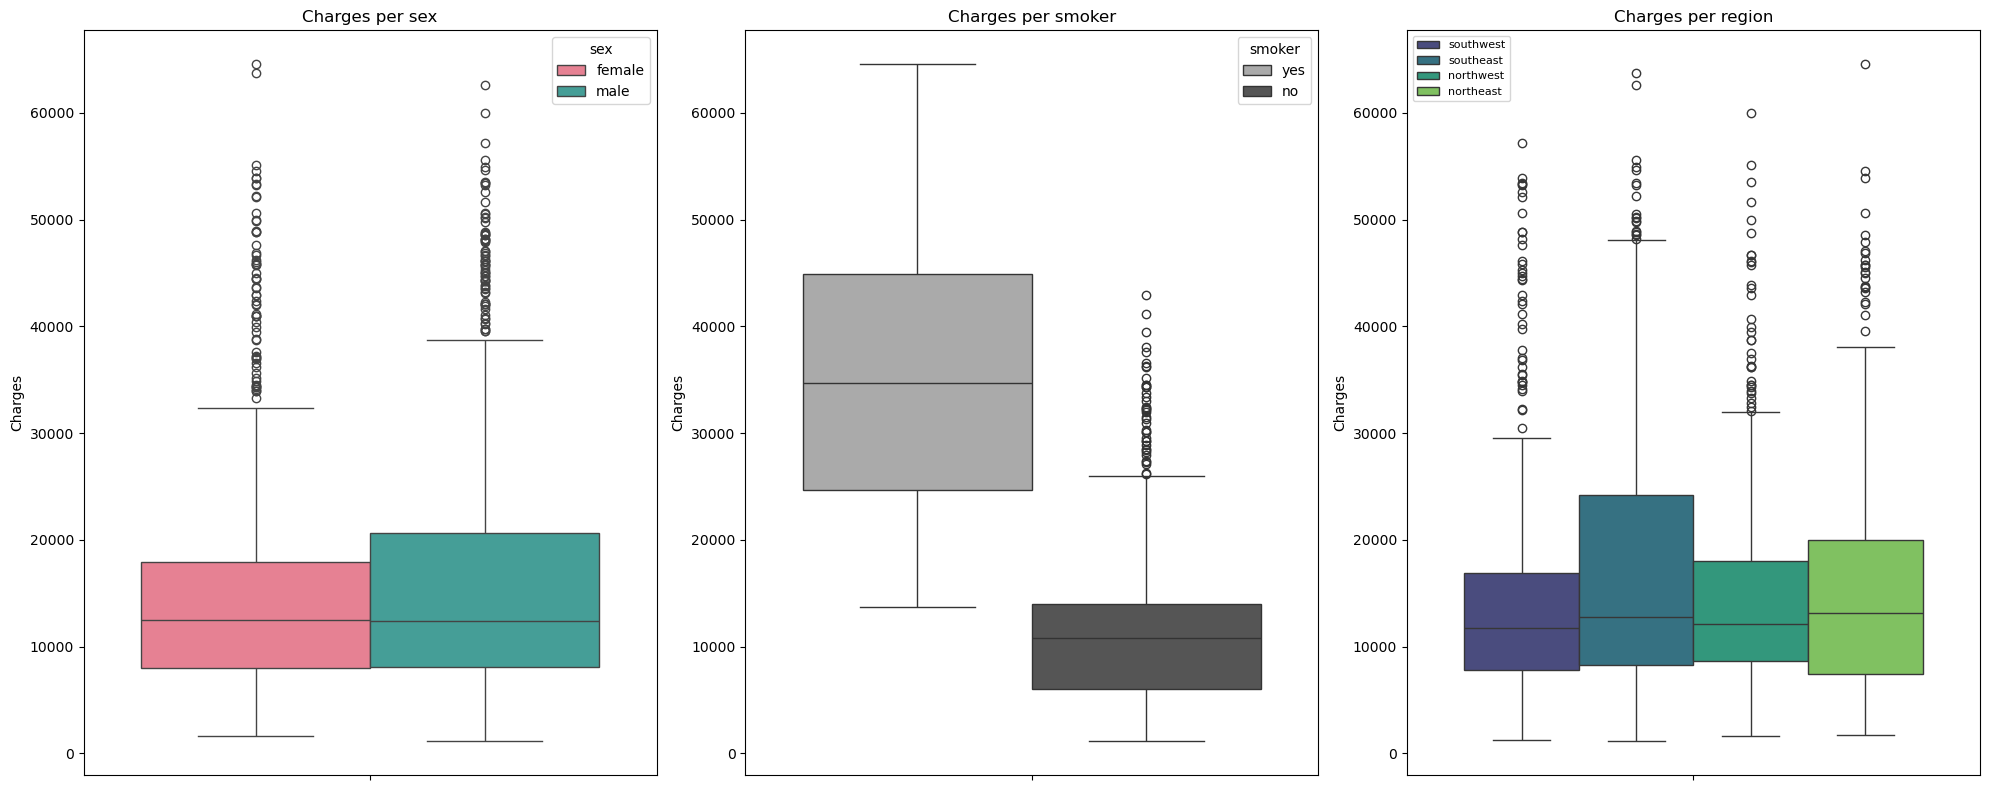

In [9]:
# plot charges vs sex
plt.figure(figsize=(20,8))

# plot distribution of charges for different sex
plt.subplot(1,3,1)
sns.boxplot(hue='sex', y="charges", data=data, palette='husl')
plt.title('Charges per sex')
plt.ylabel('Charges')

# plot distribution of charges for different smoker
plt.subplot(1,3,2)
sns.boxplot(hue='smoker', y="charges", data=data, palette='binary')
plt.title('Charges per smoker')
plt.ylabel('Charges')

# plot distribution of charges for different region
plt.subplot(1,3,3)
sns.boxplot(hue='region', y="charges", data=data, palette='viridis', legend=True)
#make legend smaller
plt.legend(loc='upper left', fontsize=8)
plt.title('Charges per region')
plt.ylabel('Charges')

plt.tight_layout()

plt.show()

## 7. Correlation Analysis

To understand how our numerical features relate to each other and to the target variable, let's calculate and visualize the correlation matrix.

### Task:
- Calculate the correlation matrix for the dataset
- Visualize the correlation matrix using a heatmap


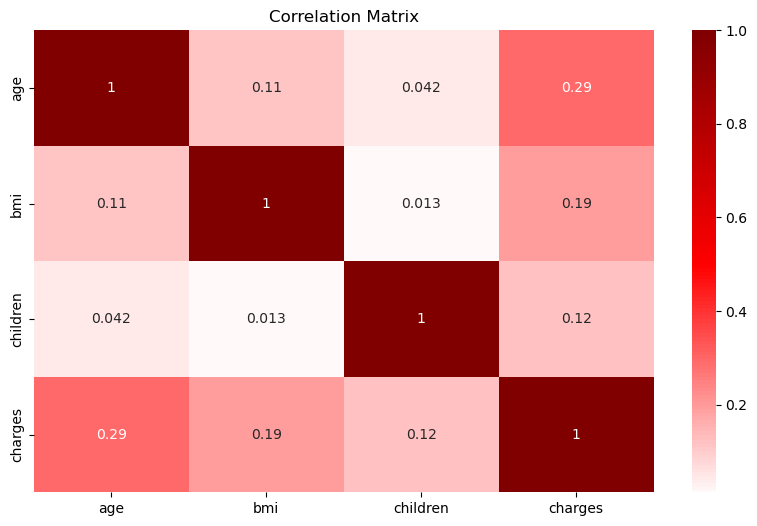

In [10]:
# Correlation matrix

numeric_cols = data.select_dtypes(include=[np.number]).columns
corr = data[numeric_cols].corr()

# correlation matrix heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='seismic', center=0)
plt.title('Correlation Matrix')
plt.show()

# Modelling time!

## 1. Find the Naive Baseline

Before we build any models, let's establish a naive baseline. This will help us understand how well our models perform compared to a simple approach. In regression problems, the naive baseline is often the mean of the target variable.

### Task:
- Calculate the mean of the target variable 'charges'
- Explain why it's important to establish a naive baseline


In [11]:
mean_charges = data['charges'].mean()
mean_charges

# Establishing a naive baseline is important because it allows us to compare the performance of our model against a simple, naive approach. 
# If our model cannot outperform a naive approach, then it is not a good model.

15799.570247204036

## 2. Initial Modelling Without GridSearch or Pipeline

Let's build a simple linear regression model without any feature engineering, grid search, or pipeline. This will serve as our initial baseline for comparison.

### Task:
- Split the data into training and test sets
- Train a simple linear regression model
- Evaluate its performance using regression metrics
- Write it down as a markdown below so you can keep track. This is a scientific experiment


In [27]:
# separate features and target variable
X = data.drop('charges', axis=1)
y = data['charges']

# categorical columns
cat_cols = data.select_dtypes(exclude=[np.number]).columns

# one hot encoding
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# calculate the mean squared error, r2 score, precision score, recall score, accuracy score and f1 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 42549664.962783314
R2 Score: 0.742881727507773


## 3. Feature Engineering

Now, let's brainstorm and create some new features to see if we can improve the model's performance.

### Questions:
1. Should we create an interaction feature between 'bmi' and 'children'? 
2. Should we create age groups to see if the model improves by categorizing age?
3. Should we create a high-risk indicator based on 'smoker' and 'bmi'?

- Remember nothing is set in stone, this is your experiment, your hypothesis. You may not need to, but its important to explore these questions

### Task:
- Create new features based on the questions above
- Explain the rationale behind each feature



> I created age groups because maybe the model will perform better with age categories. 
> I also created a high-risk indicator based on 'smoker' and 'bmi' these two features combined can provide valuable insights into the risk level of an individual, and therefore affect the cost of insurance.

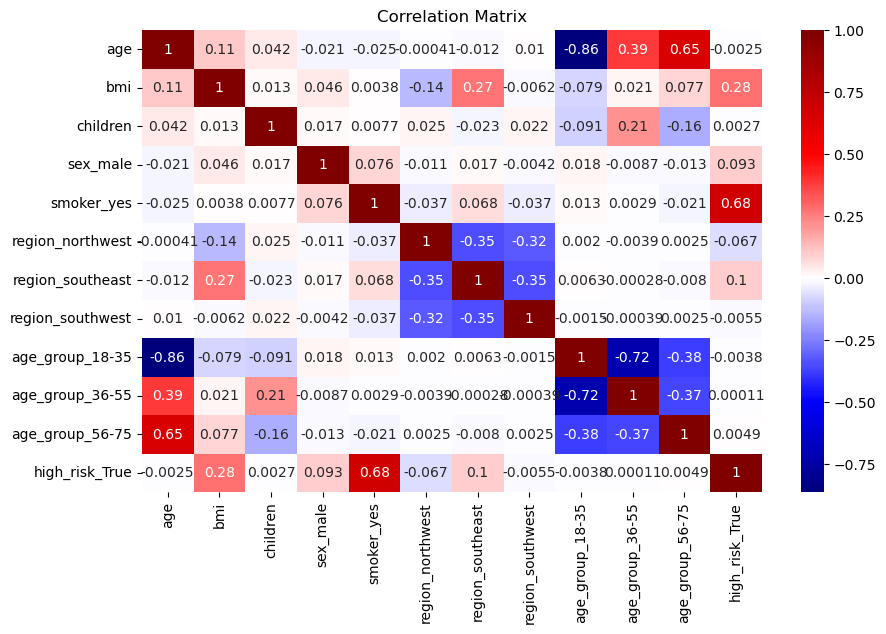

In [35]:
# create age groups and add to X, from 0-17, 18-35, 36-55, 56-75, and one hot encode
X['age_group'] = pd.cut(data['age'], bins=[0, 17, 35, 55, 75], labels=['0-17', '18-35', '36-55', '56-75'])
X = pd.get_dummies(X, columns=['age_group'], drop_first=True)

# create high risk indicator based on smoker and bmi and one hot encode
X['high_risk'] = (X['bmi'] > 30) & (X['smoker_yes'] == 1)
X = pd.get_dummies(X, columns=['high_risk'], drop_first=True)

# correlation matrix
corr = X.corr()

# correlation matrix heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='seismic', center=0)
plt.title('Correlation Matrix')
plt.show()

## 4. Modelling with Feature Engineering

Now that we have new features, let's see if they improve our model's performance.
Did it improve the performance? Yes? No? Why

### Task:
- Split the data into training and test sets
- Train a linear regression model with the new features
- Evaluate its performance using regression metrics


In [52]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a linear regression model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# calculate the mean squared error, r2 score
mse2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse2)
print('R2 Score:', r2_2)

# difference in performance
mse_diff = mse2- mse
r2_diff = r2_2 - r2

print('\nMean Squared Error Difference:', mse_diff)
print('R2 Score Difference:', r2_diff)

if mse_diff >= 0 and r2_diff <= 0:
    print('\nThe new model (with new features) is worse than the previous model')
else:
    print('\nThe new model (with new features) is better than the previous model')

Mean Squared Error: 27091236.832664005
R2 Score: 0.8276450948288135

Mean Squared Error Difference: -15458428.130119309
R2 Score Difference: 0.0847633673210405

The new model (with new features) is better than the previous model


## 5. Modelling with Pipeline and Grid Search

Now, let's see how using pipelines can simplify our workflow and prevent data leakage. We'll also use GridSearchCV to find the best hyperparameters.

### Task:
- Create a pipeline that includes scaling and linear regression
- Define a parameter grid for hyperparameter tuning
- Use GridSearchCV to find the best parameters and evaluate the model performance


In [53]:
# Create a pipeline that includes scaling and linear regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# create a pipeline
pipeline = Pipeline([('scaler',StandardScaler()), ('lr',LinearRegression())])

# define parameter grid for hyperparameter tuning
param_grid = {"lr__fit_intercept": [True, False]}

# grid search
clf = GridSearchCV(pipeline, param_grid, cv=5)
clf.fit(X_train, y_train)

print('Best Parameters:', clf.best_params_)
print('Best Score:', clf.best_score_)

Best Parameters: {'lr__fit_intercept': True}
Best Score: 0.8030102471018712


## 6. Trying Another Model with Pipeline

Let's try using a Gradient Boosting Regressor to see if it performs better.

### Task:
- Create and use a pipeline for Gradient Boosting Regressor
- Define a parameter grid for grid search
- Use GridSearchCV to find the best parameters and evaluate the model


In [54]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# create a pipeline
pipeline = Pipeline([
    ('scaler',StandardScaler()), 
    ('gbr',GradientBoostingRegressor())
    ])

# define parameter grid for hyperparameter tuning
param_grid = {
    "gbr__n_estimators": [100, 200, 300, 500],
    "gbr__learning_rate": [0.01, 0.1, 1],
    "gbr__max_depth": [3, 5, 7]
}

# grid search
clf = GridSearchCV(pipeline, param_grid, cv=5)
clf.fit(X_train, y_train)

print('Best Parameters:', clf.best_params_)
print('Best Score:', clf.best_score_)

Best Parameters: {'gbr__learning_rate': 0.01, 'gbr__max_depth': 3, 'gbr__n_estimators': 500}
Best Score: 0.8538497881044742


## 7. GridSearch with Several Models

Finally, let's compare several models using GridSearchCV to find the best one.

### Task:
- Define multiple models and their parameter grids
- Use GridSearchCV to find the best model and parameters


In [55]:
# Use grid search to compare several models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# create a pipeline
pipeline = Pipeline([
    ('scaler',StandardScaler()), 
    ('model',LinearRegression())
    ])

# define parameter grid for hyperparameter tuning
param_grid = [
    {
        'model': [LinearRegression()],
        'model__fit_intercept': [True, False]
    },
    {
        'model': [GradientBoostingRegressor()],
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 1],
        'model__max_depth': [3, 5, 7]
    },
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [100, 200, 300, 500],
        'model__max_depth': [3, 5, 7]
    },
    {
        'model': [SVR()],
        'model__kernel': ['linear', 'poly', 'rbf'],
        'model__C': [0.1, 1, 10]
    }
]

# grid search
clf = GridSearchCV(pipeline, param_grid, cv=5)
clf.fit(X_train, y_train)

print('Best Parameters:', clf.best_params_)
print('Best Score:', clf.best_score_)


Best Parameters: {'model': GradientBoostingRegressor(), 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Best Score: 0.8470584309552078


# Machine Learning: Master Challenge

## 8. Calculating Potential Cost or Loss

### Challenge:
Now that you've built and optimized your models, it's time for the final challenge! Your task is to minimize the Root Mean Squared Error (RMSE) of your model's predictions and calculate the potential financial impact of your model's errors.

### Task:
1. Calculate the RMSE of your final model's predictions.
2. Break down the errors into underestimation and overestimation.
3. Calculate the total potential cost or loss to the company.
4. Compete with your classmates to see who can achieve the lowest RMSE and financial impact!

### Explanation:
The RMSE provides an estimate of the average error in your model's predictions. We will also analyze the errors by categorizing them into underestimations and overestimations to understand their financial impact.

#### Steps to Calculate Underestimation and Overestimation Errors:

1. **Calculate RMSE**:
   - Use the `mean_squared_error` function from `sklearn.metrics` and pass your actual values (`y_test`) and predicted values (`y_pred_final`) to it.
   - Take the square root of the result to get the RMSE.
   
2. **Calculate Underestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are greater than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the actual and predicted charges.
   - Sum these differences to get the total underestimation error.

3. **Calculate Overestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are less than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the predicted and actual charges.
   - Sum these differences to get the total overestimation error.

4. **Calculate Total Potential Cost or Loss**:
   - Add the total underestimation error and the total overestimation error to get the total potential cost or loss.

### Let's see who can build the best model!

#### Detailed Instructions:

1. **Calculate RMSE**:
   - Use `mean_squared_error` with `y_test` and `y_pred_final`.
   - Use `np.sqrt` to take the square root of the result.

2. **Calculate Underestimation Error**:
   - Use a boolean condition to filter `y_test` values that are greater than `y_pred_final`.
   - Subtract the predicted values from the actual values for these instances.
   - Sum these differences.

3. **Calculate Overestimation Error**:
   - Use a boolean condition to filter `y_test` values that are less than `y_pred_final`.
   - Subtract the actual values from the predicted values for these instances.
   - Sum these differences.

4. **Calculate Total Potential Cost or Loss**:
   - Add the results of the underestimation error and overestimation error to get the total potential cost or loss.

### Example Walkthrough:

1. **Calculate RMSE**:
   - `rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))`
   - This gives you the average prediction error in dollars.

2. **Calculate Underestimation Error**:
   - `underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])`
   - This gives you the total amount by which the model undercharged.

3. **Calculate Overestimation Error**:
   - `overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])`
   - This gives you the total amount by which the model overcharged.

4. **Calculate Total Potential Cost or Loss**:
   - `total_potential_loss = underestimation_error + overestimation_error`
   - This gives you the total financial impact of the model's errors.

### Leaderboard:
Post your RMSE score and total potential cost or loss on the class leaderboard. The student with the lowest RMSE and total potential cost or loss wins bragging rights

### Post Your Results 

- Name
- Model Type
- RMSE
- Underestimation Error
- Overestimation Error
- Total Potential Cost/Loss

In [74]:
# model': GradientBoostingRegressor(), 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
under_estimation_error = np.sum(y_test[y_test > y_pred] - y_pred[y_test > y_pred])
over_estimation_error = np.sum(y_pred[y_test < y_pred] - y_test[y_test < y_pred])
total_potential_loss = under_estimation_error + over_estimation_error

# print("model type: ", clf.best_params_['model'])
for i in clf.best_params_:
    print(i, "\t:", clf.best_params_[i])
print('\nRMSE:', "${:,.2f}".format(rmse))
print('Under Estimation Error:', "${:,.2f}".format(under_estimation_error))
print('Over Estimation Error:', "${:,.2f}".format(over_estimation_error))
print('Total Potential Loss:', "${:,.2f}".format(total_potential_loss))

model 	: GradientBoostingRegressor()
model__learning_rate 	: 0.1
model__max_depth 	: 3
model__n_estimators 	: 100

RMSE: $4,402.65
Under Estimation Error: $438,161.83
Over Estimation Error: $554,512.20
Total Potential Loss: $992,674.03


## Conclusion

Congratulations! You've completed the lab. Here's a summary of what we've covered:
1. Established a naive baseline using the mean of the target variable.
2. Built an initial linear regression model without any feature engineering or optimization.
3. Performed feature engineering to create new, potentially useful features.
4. Used pipelines and GridSearchCV to optimize the model.
5. Evaluated the final model's performance using RMSE to understand its business impact.

By following these steps, you now have a robust understanding of how to approach a regression problem, from initial exploration to model optimization and business impact assessment. Great job!
